# Credit card fraud detection

## **Context**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## **Content**
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Auto-ML/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

So v1 to v28 columns are the columns which are transformed by PCA , class column is our target variable 

In [7]:
# datatypes of column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

we can see that all are in float type and also no null value are present 

In [8]:
df.isnull().values.any()

False

In [9]:
# get the fraud and normal daatset

In [10]:
fraud = df[df['Class']==1]

In [11]:
normal = df[df['Class']==0]

In [12]:
fraud.shape

(492, 31)

In [13]:
normal.shape

(284315, 31)

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

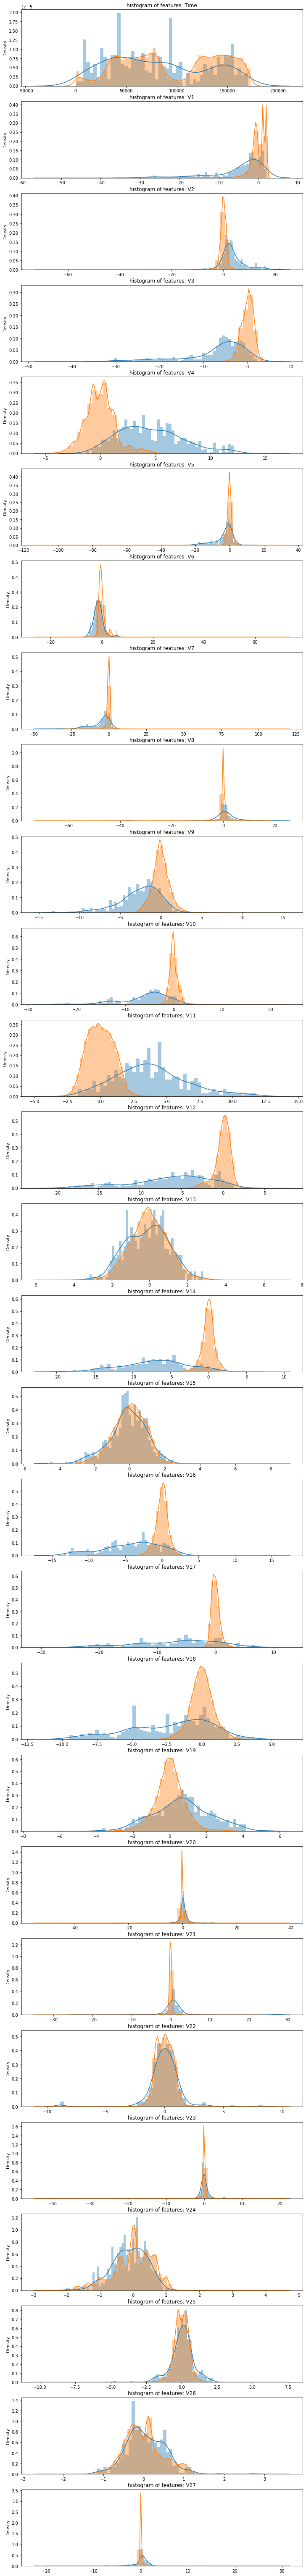

In [16]:
# Now let's do some visualization 

from matplotlib import  gridspec

features = df.iloc[:, 0:28].columns

plt.figure(figsize=(12, 28*4))

gs = gridspec.GridSpec(28, 1)
for i , c in enumerate(df[features]):
  ax= plt.subplot(gs[i])
  sns.distplot(df[c][df.Class==1], bins=50)
  sns.distplot(df[c][df.Class==0], bins=50)
  ax.set_xlabel('')
  ax.set_title('histogram of features: '+ str(c))

plt.show()

As our dataset is too large sow e will take part of datset that is we will take sample of it 

In [17]:
#Take fraction of data
df1 = df.sample(frac = 0.1, random_state= 1)
df1.shape

(28481, 31)

In [18]:
df.shape

(284807, 31)

In [19]:
#fraud and valid transactions
Fraud = df1[df1['Class']==1]
Valid = df1[df1['Class']==0]
outliers= len(Fraud)/float(len(Valid))

In [20]:
print(outliers)
print('Fraud cases: {}'. format(len(Fraud)))
print('Valid cases: {}'. format(len(Valid)))



0.0017234102419808666
Fraud cases: 49
Valid cases: 28432


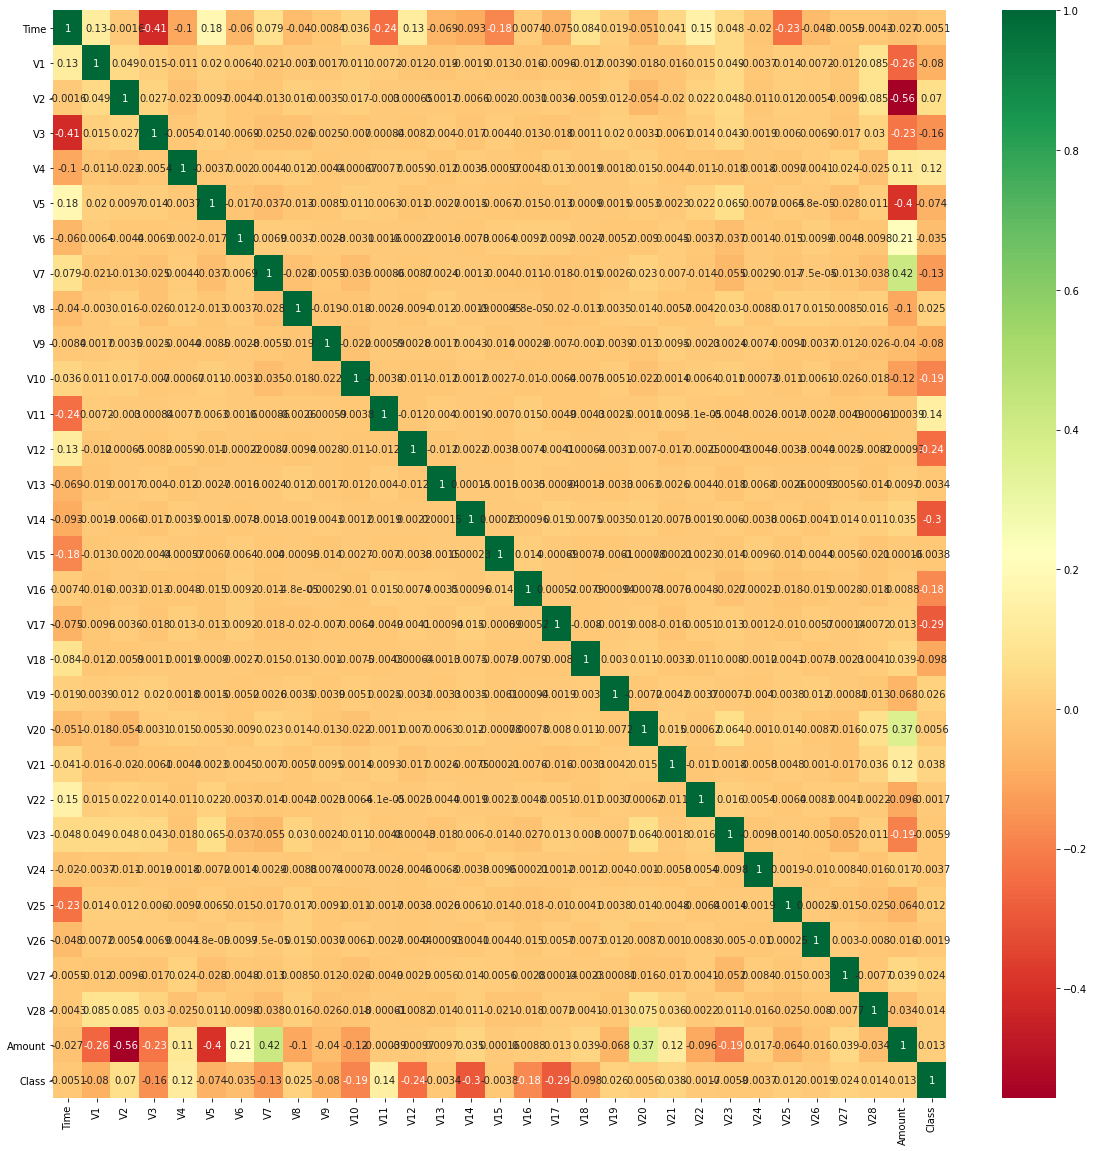

In [21]:
#correlation
corr = df1.corr()
top_corr_features= corr.index
plt.figure(figsize= (20,20))
#heat map
g= sns.heatmap(df1[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [22]:
top_corr_features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

the columns which are red or orange in color they are negatively corelated 

And the columns which are green or light green in color they are positively corelated 

In [23]:
#seperating X and Y from dataset
X= df1.drop(['Class'], axis=1)
Y= df1['Class']

X_data = X.values
Y_data = Y.values

In [24]:
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [25]:
X_data

array([[ 1.19907000e+05, -6.11711999e-01, -7.69705324e-01, ...,
         6.65013699e-02,  2.21179560e-01,  1.79000000e+00],
       [ 7.83400000e+04, -8.14681711e-01,  1.31921886e+00, ...,
         1.62427330e-01,  5.94562455e-02,  1.98000000e+00],
       [ 8.23820000e+04, -3.18193485e-01,  1.11861770e+00, ...,
         2.49049701e-01,  9.25156059e-02,  8.90000000e-01],
       ...,
       [ 3.16900000e+03, -3.15539610e-01,  1.05430314e+00, ...,
         1.94541209e-01,  1.66038832e-01,  1.96000000e+01],
       [ 9.87520000e+04, -3.58041656e+00,  4.10091605e+00, ...,
         7.85416685e-01,  3.53091883e-01,  9.20000000e-01],
       [ 6.61870000e+04,  1.21334929e+00,  2.27172159e-01, ...,
        -5.63286034e-03,  1.74000481e-02,  1.93400000e+01]])

In [26]:
Y_data

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
# splittrain and test split 

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

Random state ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order.


If you don't specify the random_state in the code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.

However, if a fixed value is assigned like random_state = 0 or 1 or 42 or any other integer then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.



Model Building

In [28]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   209  100   209    0     0   1290      0 --:--:-- --:--:-- --:--:--  1290


In [29]:
import autosklearn.classification
import sklearn.metrics

In [30]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task= 120, per_run_time_limit = 30)
automl.fit(X_train, Y_train)
y_pred = automl.predict(X_test)

print("Auto Sklearn accuracy", sklearn.metrics.accuracy_score(Y_test, y_pred))

Auto Sklearn accuracy 0.9991223450939091


In [31]:
# Auto Sklearn accuracy 0.9991223450939091

In [32]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 0796d894-e851-11eb-85b5-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.999468
  Number of target algorithm runs: 8
  Number of successful target algorithm runs: 6
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 0



In [33]:
print(automl.show_models())

[(0.380000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'extra_trees', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:extra_trees:bootstrap': 'False', 'classifier:extra_trees:criterion': 'entropy', 'classifier:extra_trees:max_depth': 'None', 'classifier:extra_trees:max_features': 0.6128603428070196, 'classifier:extra_trees:max_leaf_nodes': 'None', 'classifier:extra_trees:min_impurity_decrease': 0.0, 'classifier:extra_trees:min_samples_leaf': 1, 'classifier:extra_trees:min_samples_split': 3, 'classifier:extra_trees:min_weight_fraction_leaf': 0.0, 'data_preprocessing:catego